In [1]:
#Either we can run NN or we can run other algorithms
#import the package
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
#Reading csv file
df1=pd.read_csv(r"Master-Data_2019.csv",header=0)




In [2]:
df1.shape

(2338, 46)

In [3]:
#Removing the columns 
df1.drop(['No.', 'Degree', 'Roll No','First Name', 'Middle Name', 'Last Name','Date of Birth', 'Back Papers','Pending Back Papers','Eligible But Not Registered Count', 'Registered But Not Offer Count','Semester 8 Aggregate Marks','Back Papers.8', 'Pending Back Papers.8','year_down'], axis=1, inplace=True)
df1.columns

Index(['Degree 1 Specializations', 'Campus', 'Gender',
       'Current Aggregate Marks', 'Semester 1 Aggregate Marks',
       'Back Papers.1', 'Pending Back Papers.1', 'Semester 2 Aggregate Marks',
       'Back Papers.2', 'Pending Back Papers.2', 'Semester 3 Aggregate Marks',
       'Back Papers.3', 'Pending Back Papers.3', 'Semester 4 Aggregate Marks',
       'Back Papers.4', 'Pending Back Papers.4', 'Semester 5 Aggregate Marks',
       'Back Papers.5', 'Pending Back Papers.5', 'Semester 6 Aggregate Marks',
       'Back Papers.6', 'Pending Back Papers.6', 'Semester 7 Aggregate Marks',
       'Back Papers.7', 'Pending Back Papers.7', '12thAggregate Marks',
       '10th Aggregate Marks', 'Diploma Aggregate Marks', 'dead_back_log',
       'live_atkt', 'Job Offer Count'],
      dtype='object')

In [4]:
df= df1.copy(deep=True) # make a copy and keep original dataframe
temp_y=df['Job Offer Count']
df= df.drop('Job Offer Count', axis=1)
df = pd.concat([df,temp_y],axis=1)

print(df.isnull().sum())

Degree 1 Specializations        16
Campus                           0
Gender                          16
Current Aggregate Marks        239
Semester 1 Aggregate Marks     777
Back Papers.1                 1749
Pending Back Papers.1         1833
Semester 2 Aggregate Marks     745
Back Papers.2                 1700
Pending Back Papers.2         1826
Semester 3 Aggregate Marks     306
Back Papers.3                 1518
Pending Back Papers.3         1708
Semester 4 Aggregate Marks     335
Back Papers.4                 1646
Pending Back Papers.4         1758
Semester 5 Aggregate Marks     457
Back Papers.5                 1633
Pending Back Papers.5         1758
Semester 6 Aggregate Marks     550
Back Papers.6                 1728
Pending Back Papers.6         1753
Semester 7 Aggregate Marks    1804
Back Papers.7                 2158
Pending Back Papers.7         2158
12thAggregate Marks            626
10th Aggregate Marks            61
Diploma Aggregate Marks       1721
dead_back_log       

# Feature Engineering before model implementation

In [5]:
def preprocess_data(df):
    #df.drop(df.loc[df['Degree']=='M.Tech.'].index, inplace=True) #Dropping the M.Tech values from the Degree Columns
    df.drop(df.loc[df['Campus']=='MIT - WPU'].index, inplace=True) #Dropping the MIT-PWU values from the campus Columns
    
    #Rename Columns
    df.rename(columns={'Degree 1 Specializations':'BRANCH'},inplace=True)
    df.rename(columns={'Current Aggregate Marks':'BE_Aggregate_Marks'},inplace=True)
    df.rename(columns={'Semester 1 Aggregate Marks':'Semester1_Marks'},inplace=True)
    df.rename(columns={'Back Papers.1':'BackPapers1'},inplace=True)
    df.rename(columns={'Pending Back Papers.1':'P_BackPapers1'},inplace=True)
    df.rename(columns={'Semester 2 Aggregate Marks':'Semester2_Marks'},inplace=True)
    df.rename(columns={'Back Papers.2':'BackPapers2'},inplace=True)
    df.rename(columns={'Pending Back Papers.2':'P_BackPapers2'},inplace=True)
    df.rename(columns={'Semester 3 Aggregate Marks':'Semester3_Marks'},inplace=True)
    df.rename(columns={'Back Papers.3':'BackPapers3'},inplace=True)
    df.rename(columns={'Pending Back Papers.3':'P_BackPapers3'},inplace=True)
    df.rename(columns={'Semester 4 Aggregate Marks':'Semester4_Marks'},inplace=True)
    df.rename(columns={'Back Papers.4':'BackPapers4'},inplace=True)
    df.rename(columns={'Pending Back Papers.4':'P_BackPapers4'},inplace=True)
    df.rename(columns={'Semester 5 Aggregate Marks':'Semester5_Marks'},inplace=True)
    df.rename(columns={'Back Papers.5':'BackPapers5'},inplace=True)
    df.rename(columns={'Pending Back Papers.5':'P_BackPapers5'},inplace=True)
    df.rename(columns={'Semester 6 Aggregate Marks':'Semester6_Marks'},inplace=True)
    df.rename(columns={'Back Papers.6':'BackPapers6'},inplace=True)
    df.rename(columns={'Pending Back Papers.6':'P_BackPapers6'},inplace=True)
    df.rename(columns={'Semester 7 Aggregate Marks':'Semester7_Marks'},inplace=True)
    df.rename(columns={'Back Papers.7':'BackPapers7'},inplace=True)
    df.rename(columns={'Pending Back Papers.7':'P_BackPapers7'},inplace=True)
   # df.rename(columns={'Semester 8 Aggregate Marks':'Semester8_Marks'},inplace=True)
   # df.rename(columns={'Back Papers.8':'BackPapers8'},inplace=True)
   # df.rename(columns={'Pending Back Papers.8':'P_BackPapers8'},inplace=True)
    df.rename(columns={'12thAggregate Marks':'HSC_Marks'},inplace=True)
    df.rename(columns={'10th Aggregate Marks':'SSC_Marks'},inplace=True)
    df.rename(columns={'Diploma Aggregate Marks':'Diploma_Marks'},inplace=True)
    df.rename(columns={'Job_Offer_Count':'Job_Offer'},inplace=True)
    
    #df['Current_Aggregate_Marks']=df[ 'Current_Aggregate_Marks'].fillna(value=0) #replacing NaN Values to 0 in current_agg_marks
    
    #Filling the null value
    df['Gender'] = np.where(pd.isnull(df['Gender']), 'Male', df['Gender'])
    
    df["BRANCH"]=np.where(pd.isnull(df['BRANCH']), 'Mechanical', df['BRANCH'])
    df['BE_Aggregate_Marks']=df['BE_Aggregate_Marks'].fillna(df['BE_Aggregate_Marks'].mean())
    df['Semester1_Marks']=df['Semester1_Marks'].fillna(df['Semester1_Marks'].mean())
    df['Semester2_Marks']=df['Semester2_Marks'].fillna(df['Semester2_Marks'].mean())
    df['Semester3_Marks']=df['Semester2_Marks'].fillna(df['Semester2_Marks'].mean())
    df['Semester4_Marks']=df['Semester4_Marks'].fillna(df['Semester4_Marks'].mean())
    df['Semester5_Marks']=df['Semester5_Marks'].fillna(df['Semester5_Marks'].mean())
    df['Semester6_Marks']=df['Semester6_Marks'].fillna(df['Semester6_Marks'].mean())
    df['Semester7_Marks']=df['Semester7_Marks'].fillna(df['Semester7_Marks'].mean())
   # df['Semester8_Marks']=df['Semester8_Marks'].fillna(df['Semester8_Marks'].mean())
    
    df['HSC_Marks']=df['HSC_Marks'].fillna(df['HSC_Marks'].mean())
    df['SSC_Marks']=df['SSC_Marks'].fillna(df['SSC_Marks'].mean())
    df['Diploma_Marks']=df['Diploma_Marks'].fillna(df['Diploma_Marks'].mean())    
    
    
    df['BackPapers1']=df['BackPapers1'].fillna(value=0) #replacing NaN Values to 0 
    df['P_BackPapers1']=df['P_BackPapers1'].fillna(value=0) #replacing NaN Values to 0 
    df['BackPapers2']=df['BackPapers2'].fillna(value=0) #replacing NaN Values to 0 
    df['P_BackPapers2']=df['P_BackPapers2'].fillna(value=0) #replacing NaN Values to 0 
    df['BackPapers3']=df['BackPapers3'].fillna(value=0) #replacing NaN Values to 0 
    df['P_BackPapers3']=df['P_BackPapers3'].fillna(value=0) #replacing NaN Values to 0 
    df['BackPapers4']=df['BackPapers4'].fillna(value=0) #replacing NaN Values to 0 
    df['P_BackPapers4']=df['P_BackPapers4'].fillna(value=0) #replacing NaN Values to 0 
    df['BackPapers5']=df['BackPapers5'].fillna(value=0) #replacing NaN Values to 0
    df['P_BackPapers5']=df['P_BackPapers5'].fillna(value=0) #replacing NaN Values to 0 
    df['BackPapers6']=df['BackPapers6'].fillna(value=0) #replacing NaN Values to 0 
    df['P_BackPapers6']=df['P_BackPapers6'].fillna(value=0) #replacing NaN Values to 0 
    df['BackPapers7']=df['BackPapers7'].fillna(value=0) #replacing NaN Values to 0  
    df['P_BackPapers7']=df['P_BackPapers7'].fillna(value=0) #replacing NaN Values to 0 
   # df['BackPapers8']=df['BackPapers8'].fillna(value=0) #replacing NaN Values to 0  
   # df['P_BackPapers8']=df['P_BackPapers8'].fillna(value=0) #replacing NaN Values to 0 

    df['live_atkt']=df['live_atkt'].fillna(value=0) #replacing NaN Values to 0
    df['dead_back_log']=df['dead_back_log'].fillna(value=0) #replacing NaN Values to 0
    #df['year_down']=df['year_down'].fillna(value=0) #replacing NaN Values to 0
   
    return df


In [6]:
df = preprocess_data(df)

In [7]:
df.isnull().sum()

BRANCH                0
Campus                0
Gender                0
BE_Aggregate_Marks    0
Semester1_Marks       0
BackPapers1           0
P_BackPapers1         0
Semester2_Marks       0
BackPapers2           0
P_BackPapers2         0
Semester3_Marks       0
BackPapers3           0
P_BackPapers3         0
Semester4_Marks       0
BackPapers4           0
P_BackPapers4         0
Semester5_Marks       0
BackPapers5           0
P_BackPapers5         0
Semester6_Marks       0
BackPapers6           0
P_BackPapers6         0
Semester7_Marks       0
BackPapers7           0
P_BackPapers7         0
HSC_Marks             0
SSC_Marks             0
Diploma_Marks         0
dead_back_log         0
live_atkt             0
Job Offer Count       0
dtype: int64

In [8]:
df.dtypes

BRANCH                 object
Campus                 object
Gender                 object
BE_Aggregate_Marks    float64
Semester1_Marks       float64
BackPapers1           float64
P_BackPapers1         float64
Semester2_Marks       float64
BackPapers2           float64
P_BackPapers2         float64
Semester3_Marks       float64
BackPapers3           float64
P_BackPapers3         float64
Semester4_Marks       float64
BackPapers4           float64
P_BackPapers4         float64
Semester5_Marks       float64
BackPapers5           float64
P_BackPapers5         float64
Semester6_Marks       float64
BackPapers6           float64
P_BackPapers6         float64
Semester7_Marks       float64
BackPapers7           float64
P_BackPapers7         float64
HSC_Marks             float64
SSC_Marks             float64
Diploma_Marks         float64
dead_back_log         float64
live_atkt             float64
Job Offer Count         int64
dtype: object

In [9]:
m=df['Diploma_Marks'].notnull() #findind all the values in diploma which are not null
df.loc[m,'HSC_Marks']=df.loc[m,'HSC_Marks'].fillna(df['HSC_Marks'])  #replacing all diploma marks with 12th 
#df.drop(['Diploma_Marks']
df['temp_y'] =df['Job Offer Count']

In [10]:


from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 
# Encode labels in column 'in all'. 
label_encoder = LabelEncoder() 
# Encode labels in column 'in all'. 
#Degree_label_encoder= LabelEncoder()
Campus_label_encoder= LabelEncoder()
BRANCH_label_encoder= LabelEncoder()
Gender_label_encoder= LabelEncoder()
#df['Degree']= Degree_label_encoder.fit_transform(df['Degree'])
df['Campus']= Campus_label_encoder.fit_transform(df['Campus'])
df['BRANCH']= BRANCH_label_encoder.fit_transform(df['BRANCH'])
df['Gender']= Gender_label_encoder.fit_transform(df['Gender'])


In [11]:
df.drop(['Job Offer Count'], axis=1, inplace=True)
df.head(5)

,BRANCH,Campus,Gender,BE_Aggregate_Marks,Semester1_Marks,BackPapers1,P_BackPapers1,Semester2_Marks,BackPapers2,P_BackPapers2,...,P_BackPapers6,Semester7_Marks,BackPapers7,P_BackPapers7,HSC_Marks,SSC_Marks,Diploma_Marks,dead_back_log,live_atkt,temp_y
0,12,0,1,6.750000,7.000000,1.0,0.0,6.940000,1.0,0.0,...,0.0,7.924697,0.0,0.0,73.850000,82.000000,82.196817,0.0,0.0,0
1,0,2,1,6.660000,8.760000,0.0,0.0,7.640000,0.0,0.0,...,0.0,7.924697,0.0,0.0,79.230000,90.360000,82.196817,0.0,0.0,0
2,9,2,1,7.674359,8.124134,0.0,0.0,7.869851,0.0,0.0,...,0.0,7.924697,0.0,0.0,77.831629,85.521949,82.196817,0.0,0.0,0
3,2,1,1,8.440000,9.000000,0.0,0.0,8.620000,0.0,0.0,...,0.0,7.924697,0.0,0.0,76.760000,92.200000,82.196817,0.0,0.0,0
4,9,1,1,7.674359,8.124134,0.0,0.0,7.869851,0.0,0.0,...,0.0,7.924697,0.0,0.0,86.700000,84.000000,82.196817,0.0,0.0,0


In [12]:
df_col_idx = [df.columns.get_loc(c) for c in df.columns.values if c in df]
df_col_name = list(df.columns.values)
print (df_col_name)
print (df_col_idx)


['BRANCH', 'Campus', 'Gender', 'BE_Aggregate_Marks', 'Semester1_Marks', 'BackPapers1', 'P_BackPapers1', 'Semester2_Marks', 'BackPapers2', 'P_BackPapers2', 'Semester3_Marks', 'BackPapers3', 'P_BackPapers3', 'Semester4_Marks', 'BackPapers4', 'P_BackPapers4', 'Semester5_Marks', 'BackPapers5', 'P_BackPapers5', 'Semester6_Marks', 'BackPapers6', 'P_BackPapers6', 'Semester7_Marks', 'BackPapers7', 'P_BackPapers7', 'HSC_Marks', 'SSC_Marks', 'Diploma_Marks', 'dead_back_log', 'live_atkt', 'temp_y']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [13]:
X=df.iloc[:,:len(df_col_idx)-1]    # predictors
y = df['temp_y']     # target variable
print("X:",X.shape)
print("y:",y.shape)

X: (2194, 30)
y: (2194,)


In [14]:
# Split dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2019)
df.head(10)


,BRANCH,Campus,Gender,BE_Aggregate_Marks,Semester1_Marks,BackPapers1,P_BackPapers1,Semester2_Marks,BackPapers2,P_BackPapers2,...,P_BackPapers6,Semester7_Marks,BackPapers7,P_BackPapers7,HSC_Marks,SSC_Marks,Diploma_Marks,dead_back_log,live_atkt,temp_y
0,12,0,1,6.750000,7.000000,1.0,0.0,6.940000,1.0,0.0,...,0.0,7.924697,0.0,0.0,73.850000,82.000000,82.196817,0.0,0.0,0
1,0,2,1,6.660000,8.760000,0.0,0.0,7.640000,0.0,0.0,...,0.0,7.924697,0.0,0.0,79.230000,90.360000,82.196817,0.0,0.0,0
2,9,2,1,7.674359,8.124134,0.0,0.0,7.869851,0.0,0.0,...,0.0,7.924697,0.0,0.0,77.831629,85.521949,82.196817,0.0,0.0,0
3,2,1,1,8.440000,9.000000,0.0,0.0,8.620000,0.0,0.0,...,0.0,7.924697,0.0,0.0,76.760000,92.200000,82.196817,0.0,0.0,0
4,9,1,1,7.674359,8.124134,0.0,0.0,7.869851,0.0,0.0,...,0.0,7.924697,0.0,0.0,86.700000,84.000000,82.196817,0.0,0.0,0
5,12,0,1,8.290000,8.120000,0.0,0.0,8.260000,0.0,0.0,...,0.0,7.924697,0.0,0.0,85.690000,86.360000,82.196817,0.0,0.0,1
6,7,2,1,7.170000,7.160000,1.0,0.0,7.120000,2.0,0.0,...,0.0,7.924697,0.0,0.0,80.000000,91.500000,82.196817,0.0,0.0,1
7,5,2,1,8.140000,7.480000,2.0,0.0,7.920000,3.0,0.0,...,0.0,7.924697,0.0,0.0,66.150000,77.820000,82.196817,0.0,0.0,2
8,7,1,1,7.580000,8.124134,0.0,0.0,7.869851,0.0,0.0,...,0.0,7.924697,0.0,0.0,77.831629,89.640000,80.750000,0.0,0.0,1
9,9,2,1,9.240000,8.124134,0.0,0.0,7.869851,0.0,0.0,...,0.0,7.924697,0.0,0.0,77.831629,92.000000,90.710000,0.0,0.0,1


In [15]:
#import StandardScale` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
#X_train = StandardScaler().fit_transform(X_train)
X_test = standard_scaler.transform(X_test)
#X_test = StandardScaler().fit_transform(X_test)

LR: 0.699754 (0.039619)
SVM: 0.712779 (0.038632)
DTreeC: 0.681483 (0.031936)
RF: 0.756986 (0.035511)
NB: 0.166781 (0.032236)
KNN: 0.688571 (0.035277)


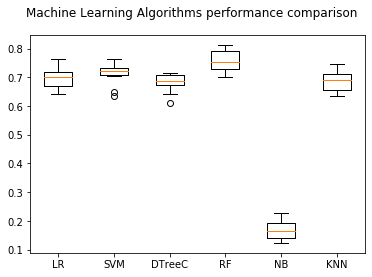

In [19]:
from sklearn.model_selection import KFold
models_list = []

models_list.append(('LR', LogisticRegression(max_iter=1000)))
models_list.append(('SVM', SVC()))
models_list.append(('DTreeC', DecisionTreeClassifier()))
models_list.append(('RF', RandomForestClassifier(n_estimators=300, max_features=3)))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

results = []
algo_names = []

for name, model in models_list:
    kfold = KFold(n_splits=10, random_state=2019)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cross_val_results)
    algo_names.append(name)
    info = "%s: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
    print(info)

fig = plt.figure()
fig.suptitle('Machine Learning Algorithms performance comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(algo_names)
plt.show()



In [48]:
#Logistic

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

y_train_pred=logmodel.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=logmodel.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

from sklearn.metrics import classification_report
report=classification_report(y_test,predictions)
print("\n\nClassification Report:\n",report)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
print("\nConfusion Matrix:\n",cm)

accuracy=accuracy_score(y_test,predictions)
print("\nAccuracy:",accuracy)

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,predictions,margins=True,rownames=['Actual'],colnames=['Prediction']))



Train Results...     Accuracy :  0.716358839050132

Test Results...      Accuracy :  0.68


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.77       413
           1       0.57      0.43      0.49       225
           2       0.00      0.00      0.00        12

    accuracy                           0.68       650
   macro avg       0.43      0.42      0.42       650
weighted avg       0.65      0.68      0.66       650


Confusion Matrix:
 [[346  67   0]
 [129  96   0]
 [  7   5   0]]

Accuracy: 0.68


Confusion matrix using Crosstab :
Prediction    0    1  All
Actual                   
0           346   67  413
1           129   96  225
2             7    5   12
All         482  168  650


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# linear SVM classifier

#It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary 

from sklearn.svm import SVC 

svm_model_linear = SVC(kernel = 'linear', C = 1)
svm_model_linear.fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

y_train_pred=svm_model_linear.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=svm_model_linear.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Train Results...     Accuracy :  0.7137203166226913

Test Results...      Accuracy :  0.6738461538461539


confusion marix :
[[347  66   0]
 [134  91   0]
 [  8   4   0]]


Classification Reports :
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       413
           1       0.57      0.40      0.47       225
           2       0.00      0.00      0.00        12

    accuracy                           0.67       650
   macro avg       0.42      0.41      0.41       650
weighted avg       0.65      0.67      0.65       650



Confusion matrix using Crosstab :
Prediction    0    1  All
Actual                   
0           347   66  413
1           134   91  225
2             8    4   12
All         489  161  650


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Decision Tree Classifier

#The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features



clf=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=2019)
clf.fit(X_train,y_train)

print('\n\nFeature Importances :', clf.feature_importances_)

y_train_pred=clf.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=clf.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))


print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Feature Importances : [0.         0.18445581 0.01789128 0.         0.12271713 0.
 0.         0.         0.01054966 0.00849477 0.         0.
 0.02150007 0.         0.29116701 0.         0.         0.10543634
 0.         0.         0.04599777 0.         0.00550263 0.0388846
 0.         0.         0.10182736 0.02450738 0.0210682  0.
 0.        ]


Train Results...     Accuracy :  0.8034300791556728

Test Results...      Accuracy :  0.7246153846153847


confusion marix :
[[344  69   0]
 [ 97 127   1]
 [  5   7   0]]


Classification Reports :
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       413
           1       0.63      0.56      0.59       225
           2       0.00      0.00      0.00        12

    accuracy                           0.72       650
   macro avg       0.47      0.47      0.46       650
weighted avg       0.71      0.72      0.71       650



Confusion matrix using Crosstab :
Prediction    0    1  2  All
Actual 

In [17]:
# Random Forest

#Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.
# Random Forest

#Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

num_trees = 10
n_jobs = -1 

rd = RandomForestClassifier(n_estimators=num_trees,max_leaf_nodes=65,n_jobs=n_jobs,random_state=2019)
rd.fit(X_train, y_train)
y_pred=rd.predict(X_test)
print('\n\nFeature Importances :', rd.feature_importances_)

y_train_pred=rd.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=rd.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Feature Importances : [0.1378012  0.01857907 0.00751133 0.13131577 0.03938985 0.00505901
 0.         0.05205398 0.00620191 0.         0.08103805 0.01544555
 0.         0.13120316 0.00570451 0.00570871 0.03463365 0.00678501
 0.00285717 0.08735955 0.00768735 0.0020267  0.02954076 0.0005469
 0.00075672 0.0955834  0.04907459 0.02778727 0.01007221 0.00827661]


Train Results...     Accuracy :  0.8625407166123779

Test Results...      Accuracy :  0.7693474962063733


confusion marix :
[[389  48   0]
 [ 93 118   0]
 [  7   4   0]]


Classification Reports :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       437
           1       0.69      0.56      0.62       211
           2       0.00      0.00      0.00        11

    accuracy                           0.77       659
   macro avg       0.50      0.48      0.49       659
weighted avg       0.75      0.77      0.76       659



Confusion matrix using Crosstab :
Prediction    0    1  Al

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
y_test_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [162]:
# Naive Bayes

#It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class. 
#It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.


num_folds=10

kfold=StratifiedKFold(n_splits=num_folds,random_state=2019)


gnb_clf=GaussianNB()
gnb_clf.fit(X_train,y_train)
results=cross_val_score(gnb_clf,X_train,y_train,cv=kfold)
print("CV-Accuracy:" ,results.mean())


y_train_pred=gnb_clf.predict(X_train)
print("Train------ Accuracy:",accuracy_score(y_train,y_train_pred))


y_test_pred=gnb_clf.predict(X_test)
print("Test------ Accuracy:",accuracy_score(y_test,y_test_pred))

CV-Accuracy: 0.16939139292080468
Train------ Accuracy: 0.1719869706840391
Test------ Accuracy: 0.16995447647951442


In [54]:
# KNN

#Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import GaussianNB

k=7

knn_clf=KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train,y_train)

results=cross_val_score(knn_clf,X_train,y_train,cv=kfold)
print("CV-Accuracy:" ,results.mean())


y_train_pred=knn_clf.predict(X_train)
print("Train------ Accuracy:",accuracy_score(y_train,y_train_pred))


y_test_pred=knn_clf.predict(X_test)
print("Test------ Accuracy:",accuracy_score(y_test,y_test_pred))


CV-Accuracy: 0.7018342628093412
Train------ Accuracy: 0.7704485488126649
Test------ Accuracy: 0.6892307692307692


# Testing single record for prediction of placement

In [120]:
#'Degree', 'BRANCH', 'Campus', 'Gender', 'BE_Aggregate_Marks', 'Semester1_Marks', 'BackPapers1', 'P_BackPapers1', 'Semester2_Marks', 'BackPapers2', 'P_BackPapers2', 'Semester3_Marks', 'BackPapers3', 'P_BackPapers3', 'Semester4_Marks', 'BackPapers4', 'P_BackPapers4', 'Semester5_Marks', 'BackPapers5', 'P_BackPapers5', 'Semester6_Marks', 'BackPapers6', 'P_BackPapers6', 'Semester7_Marks', 'BackPapers7', 'P_BackPapers7', 'HSC_Marks', 'SSC_Marks', 'Diploma_Marks', 'dead_back_log', 'live_atkt','temp_y'

In [19]:
test_record=['Electronics & Telecommunication Engineering (E&TC)','MITCOE','Female',9.14,9.48,0,0,9.92,0,0,6.0,0,0,9.0,0,0,9.39,0,0,9.05,0,0,9.5,0,0,86.15,98,88,0,0]
#test_record[0]=Degree_label_encoder.fit_transform([test_record[0]])[0]             
test_record[0]=BRANCH_label_encoder.transform([test_record[0]])[0]
test_record[1]=Campus_label_encoder.transform([test_record[1]])[0]
test_record[2]=Gender_label_encoder.transform([test_record[2]])[0]
test_record

[5,
 2,
 0,
 9.14,
 9.48,
 0,
 0,
 9.92,
 0,
 0,
 6.0,
 0,
 0,
 9.0,
 0,
 0,
 9.39,
 0,
 0,
 9.05,
 0,
 0,
 9.5,
 0,
 0,
 86.15,
 98,
 88,
 0,
 0]

In [20]:
standarize_new_record=standard_scaler.transform([test_record])
standarize_new_record

array([[-0.22180477,  1.20930487, -1.55521968,  1.70938489,  1.55798345,
        -0.28569561, -0.02553215,  2.32340867, -0.37220471, -0.03096703,
        -2.11795161, -0.4271708 , -0.08715302,  1.53814368, -0.33364691,
        -0.08788344,  1.94736735, -0.38055018, -0.16681516,  1.58779061,
        -0.24565567, -0.17983383,  3.00895531, -0.08472187, -0.10018574,
         0.97431857,  1.10115946,  1.26023712, -0.3510486 , -0.26224888]])

In [21]:
newrecord_pred = rd.predict(standarize_new_record)
newrecord_pred[0]

1